In [1]:
import intake
intake.output_notebook()

In [2]:
%%writefile test_fit.yaml

sources:
  posterior:
    args:
      csv_kwargs:
        delim_whitespace: true
        names:
        - age
        - feh
        - distance
        - AV
        - alpha
        - gamma
        - fB
        - lnpost
      urlpath: https://bio.rc.ufl.edu/pub/tmorton/cluster_fits/test/chains/mist-cluster-post_equal_weights.dat
    description: "Posterior samples for fit of test star cluster of 50 stars.  Fit performed using MultiNest"
    driver: csv
    cache:
      - argkey: urlpath
        regex: 'post_equal_weights.dat'
        type: file
    metadata:
        truths:
            - 8.84
            - -0.2
            - 500
            - 0.03
            - -3
            - 0.3
            - 0.3


Overwriting test_fit.yaml


In [3]:
%%writefile test_qmin.yaml

sources:
  posterior:
    args:
      csv_kwargs:
        delim_whitespace: true
        names:
        - age
        - feh
        - distance
        - AV
        - alpha
        - gamma
        - fB
        - lnpost
      urlpath: https://bio.rc.ufl.edu/pub/tmorton/cluster_fits/test_qmin0.5/chains/mist-cluster-post_equal_weights.dat
    description: "Posterior samples for fit of test star cluster of 50 stars.  Fit performed using MultiNest.  minq of fit set to 0.5 to try to alleviate issues with fB."
    driver: csv
    cache:
      - argkey: urlpath
        regex: 'post_equal_weights.dat'
        type: file
    metadata:
        truths:
            - 8.84
            - -0.2
            - 500
            - 0.03
            - -3
            - 0.3
            - 0.3


Overwriting test_qmin.yaml


In [4]:
cat = intake.open_catalog('test_qmin.yaml')

In [6]:
df = cat.posterior.read()

2018-11-06 23:56:23,721 intake:WARNING, Cache progress bar requires tqdm to be installed: conda/pip install tqdm


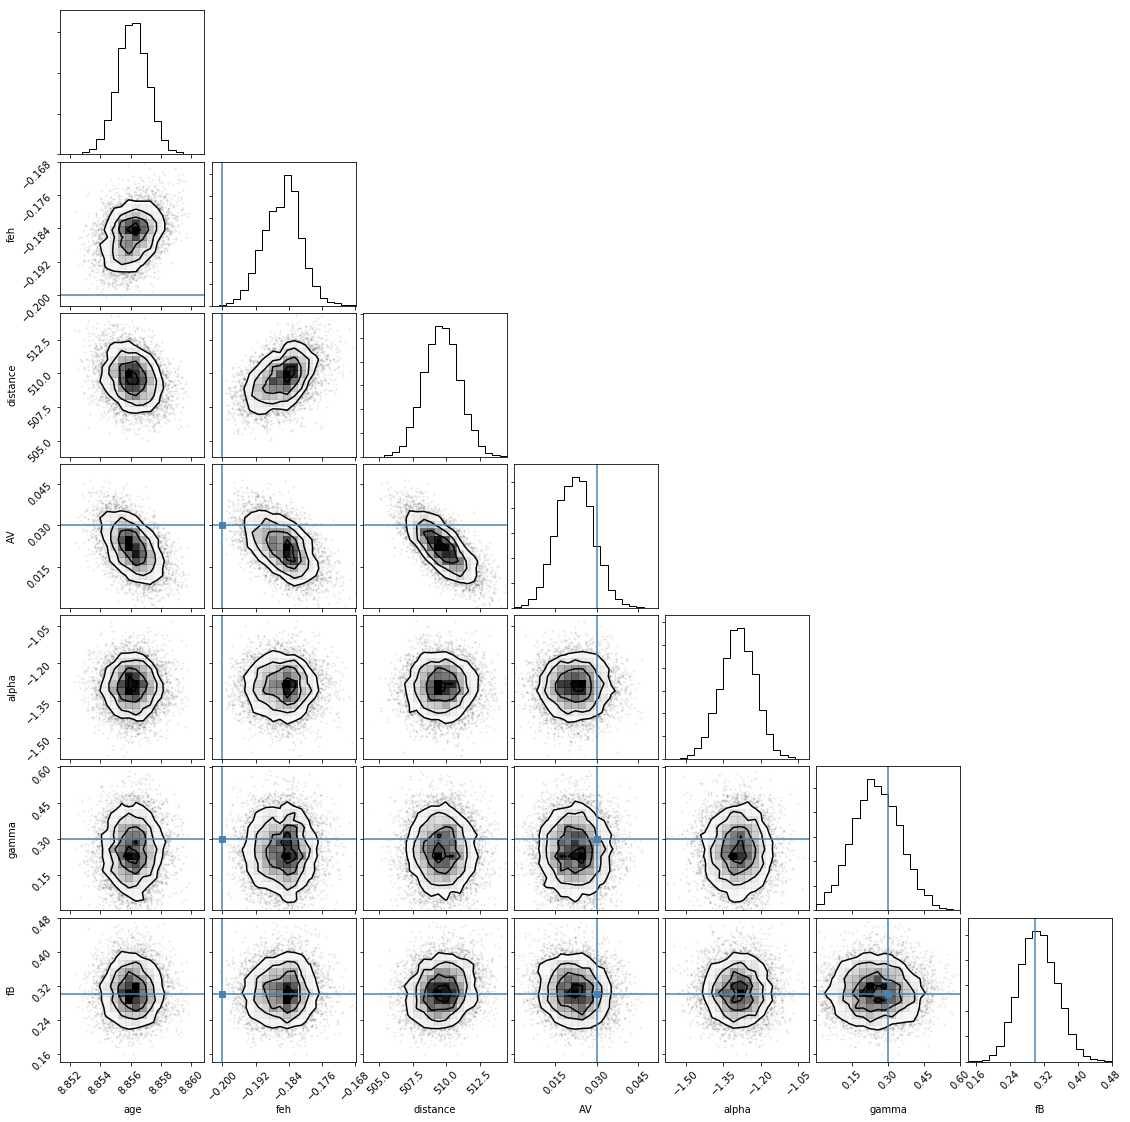

In [9]:
%matplotlib inline
import corner

names = ['age', 'feh', 'distance', 'AV', 'alpha', 'gamma', 'fB', 'lnpost']
fig = corner.corner(df[names[:-1]], names=names, truths=cat.posterior.metadata['truths'])